# 机器学习大作业--火灾识别
----
#### 作者:   魏博文 2022217409 计算机22-3班


#### 数据集来源: 
考虑到文件格式、电脑设备、运行时间等原因，我的数据集有改动；
尤其是训练集，删减了很多重复且低质量的图片；
有些类型的图片占比不合理，例如冬季森林、城市公园的比例较大，因此我删了很多，以保证训练效果和训练速度
- https://www.kaggle.com/datasets/kutaykutlu/forest-fire
- https://www.kaggle.com/datasets/nimapourmoradi/forest-fire-regression
- https://www.kaggle.com/datasets/colvertgomez/goes16-wildfires-smoke-plumes-dataset
##### 注: 敲代码、查error不易，希望老师能给个高分，祝老师每天好心情


接下来采用两种方法
### 方法一：基于MobileNetV2的图像分类模型

In [8]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


- 导入必要的库

In [4]:
# 导入numpy库，用于进行线性代数计算
import numpy as np

# 导入pandas库，用于数据处理和CSV文件的读写操作
import pandas as pd

# 导入os库，用于处理文件和目录
import os

In [5]:
# 导入pandas库，用于数据处理和分析
import pandas as pd
# 导入numpy库，用于进行数值计算
import numpy as np
# 导入seaborn库，用于数据可视化
import seaborn as sns
# 导入matplotlib.pyplot库，用于绘制图形
import matplotlib.pyplot as plt

# 导入os库，用于处理文件和目录
import os
# 导入os.path库，用于处理文件路径
import os.path
# 导入pathlib库的Path类，用于处理文件路径
from pathlib import Path
# 导入glob库，用于查找符合特定规则的文件路径名
import glob


# 导入sklearn.metrics的confusion_matrix、accuracy_score、classification_report、roc_auc_score、roc_curve等函数，用于评估模型性能
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
# 导入sklearn.model_selection的GridSearchCV和cross_val_score函数，用于网格搜索和交叉验证
from sklearn.model_selection import GridSearchCV, cross_val_score
# 导入sklearn.metrics的mean_squared_error和r2_score函数，用于评估回归模型的性能
from sklearn.metrics import mean_squared_error, r2_score

# 导入keras.optimizers的RMSprop、Adam、Optimizer类，用于优化器的选择
from keras.optimizers import RMSprop, Adam, Optimizer

# 导入tensorflow.keras.models的Sequential类，用于构建序列模型
from tensorflow.keras.models import Sequential
# 导入keras.layers的各种层，用于构建神经网络模型
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Permute, TimeDistributed, Bidirectional, GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
# 导入keras的models和layers模块
import keras.models
import keras.layers
# 导入tensorflow库
import tensorflow as tf
# 导入keras.applications的VGG16、VGG19、inception_v3模块，用于预训练模型的使用
from keras.applications import VGG16, VGG19, inception_v3
# 导入keras的backend模块，用于后端操作
from keras import backend as K
# 导入keras.utils的plot_model函数，用于绘制模型结构图
from keras.utils import plot_model

# 导入PIL库的Image模块，用于处理图像
from PIL import Image
# 导入keras.preprocessing的image模块，用于图像预处理
from keras.preprocessing import image
# 导入tensorflow.keras.preprocessing.image的ImageDataGenerator类，用于生成批量的图像数据
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 导入cv2库，用于处理图像
import cv2
# 导入keras.applications.vgg16的preprocess_input和decode_predictions函数，用于VGG16模型的预处理和解码预测结果
from keras.applications.vgg16 import preprocess_input, decode_predictions

# 导入sklearn.preprocessing的StandardScaler类，用于数据标准化
from sklearn.preprocessing import StandardScaler
# 导入sklearn.preprocessing的MinMaxScaler类，用于数据归一化
from sklearn.preprocessing import MinMaxScaler
# 导入tensorflow.keras.utils的to_categorical函数，用于将类别向量转换为二进制矩阵
from tensorflow.keras.utils import to_categorical
# 导入sklearn.model_selection的train_test_split函数，用于将数据集划分为训练集和测试集
from sklearn.model_selection import train_test_split
# 导入keras的regularizers模块，用于正则化
from keras import regularizers
# 导入sklearn.preprocessing的LabelEncoder类，用于对标签进行编码
from sklearn.preprocessing import LabelEncoder

# 导入xgboost、lightgbm、catboost等库的分类器和回归器，用于集成学习
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
# 导入sklearn.linear_model的LogisticRegression、GaussianNB等类，用于线性模型和朴素贝叶斯分类器
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# 导入sklearn.ensemble的RandomForestClassifier、RandomForestRegressor、GradientBoostingClassifier、GradientBoostingRegressor等类，用于集成学习的分类器和回归器
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
# 导入sklearn.tree的DecisionTreeClassifier、DecisionTreeRegressor类，用于决策树分类器和回归器
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# 导入sklearn.neural_network的MLPClassifier、MLPRegressor类，用于多层感知机分类器和回归器
from sklearn.neural_network import MLPClassifier, MLPRegressor
# 导入sklearn.neighbors的KNeighborsClassifier、KNeighborsRegressor类，用于K近邻分类器和回归器
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# 导入sklearn.linear_model的LinearRegression、PLSRegression、Ridge、RidgeCV、Lasso、LassoCV、ElasticNet、ElasticNetCV类，用于线性回归、偏最小二乘回归、岭回归、套索回归、弹性网络回归等回归模型
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.cross_decomposition import PLSRegression


# 导入tensorflow.keras.callbacks的LearningRateScheduler类，用于学习率调度
from tensorflow.keras.callbacks import LearningRateScheduler

# 忽略警告信息
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)


- 设置训练集和测试集的地址

In [6]:
train_data_dir = r'C:\Users\魏博文\Desktop\机器学习大作业魏博文\archive\FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET\train'
test_data_dir = r'C:\Users\魏博文\Desktop\机器学习大作业魏博文\archive\FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET\test'

### 我觉得这些功能很实用，能减轻工作量，毕竟最开始的时候要处理接近3万张训练集，先分类贴标签，再决定删除和保留
- 导入ImageDataGenerator类，用于数据增强和归一化处理

- TensorFlow的ImageDataGenerator类通过动态地扩充训练数据并提高模型泛化能力。允许用户在训练过程中实时地对图像进行多种变换，如旋转、缩放、平移和翻转等。每次迭代时，模型都会接触到略有不同的图像版本。有助于模型学习到更加鲁棒的特征，从而减少过拟合的风险。

- ImageDataGenerator的归一化处理功能是通过对图像特征进行中心化或标准化来实现的。例如，可以通过设置featurewise_center参数来使输入值按照均值为0进行处理，这有助于加快模型的收敛速度并提高训练效率。

- ImageDataGenerator类还具有自动为训练数据生成标签的能力，这在使用分类任务中的文件夹结构时特别有用。例如，如果训练数据包含三个文件夹，一个包含火的图片，一个包含无或的图片，最后一个是有烟的图片，ImageDataGenerator会自动将图片标签设置为火、无火或有烟。


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 创建一个ImageDataGenerator实例，用于训练数据的数据增强和归一化处理
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 对图像进行归一化处理，将像素值缩放到0-1之间
    rotation_range=20,  # 随机旋转图像的角度范围
    width_shift_range=0.2,  # 随机水平平移图像的范围
    height_shift_range=0.2,  # 随机垂直平移图像的范围
    shear_range=0.2,  # 随机剪切变换的程度
    zoom_range=0.2,  # 随机缩放图像的范围
    horizontal_flip=True,  # 随机水平翻转图像
    fill_mode='nearest'  # 填充新创建像素的方法
)

# 创建一个ImageDataGenerator实例，用于测试数据的数据增强和归一化处理
test_datagen = ImageDataGenerator(rescale=1./255)

# 设置批量大小
batch_size = 32

# 从指定目录生成训练数据的批次
train_generator = train_datagen.flow_from_directory(
    train_data_dir,  # 训练数据的目录
    target_size=(224, 224),  # 图像的目标大小
    batch_size=batch_size,  # 批量大小
    class_mode='categorical'  # 分类模式
)

# 从指定目录生成测试数据的批次
test_generator = test_datagen.flow_from_directory(
    test_data_dir,  # 测试数据的目录
    target_size=(224, 224),  # 图像的目标大小
    batch_size=batch_size,  # 批量大小
    class_mode='categorical'  # 分类模式
)


Found 14538 images belonging to 3 classes.
Found 2706 images belonging to 3 classes.


- 这是我的4.0版本，程序结果训练集train set分成了3类：有火、无火、有烟，大约1.5万张
- 4.0版本之前的草稿训练集有超过3万张，这里我做了删减工作，把很多同质化、有过明显PS处理的、质量较差的、与主题无关的图片删掉了。这样做是为了模型的精确度，更主要是为了训练时间，之前的草稿，训练一轮就要花37分钟，总共训练5轮是不可能的。

再从训练集中获取5张图片，获取标签，0是有烟、1是有火、2是无火

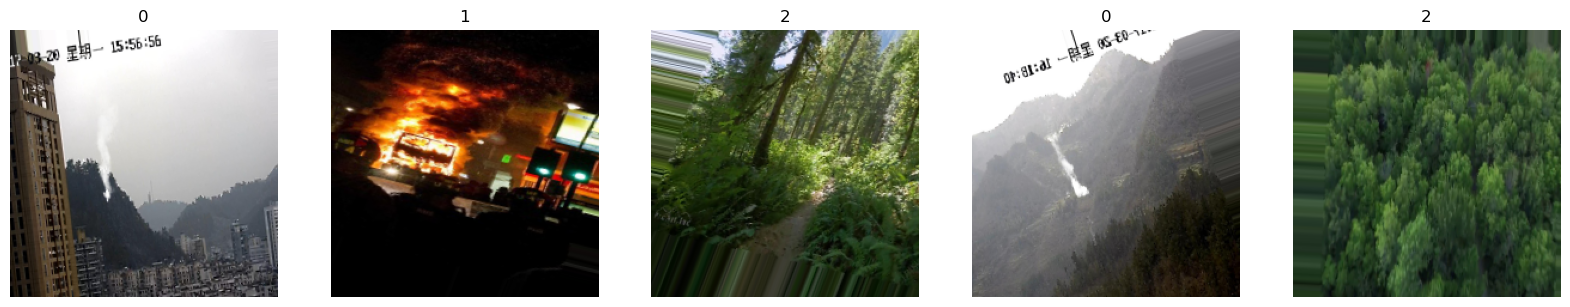

In [9]:
def plot_images(generator, num_images=5):
    # 从生成器中获取一批图像和标签
    batch_images, batch_labels = next(generator)
    
    # 从这批图像和标签中提取前num_images个
    images = batch_images[:num_images]
    labels = batch_labels[:num_images]
    
    # 将标签转换为类别名称（整数）
    label_names = np.argmax(labels, axis=1)
    
    # 创建一个1行num_images列的子图布局
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    
    # 遍历每个图像，显示在对应的子图中
    for i in range(num_images):
        axes[i].imshow(images[i])  # 显示图像
        axes[i].set_title(label_names[i])  # 设置子图标题为类别名称
        axes[i].axis('off')  # 关闭坐标轴
    
    # 显示整个图像布局
    plt.show()

# 调用plot_images函数，传入train_generator作为参数
plot_images(train_generator)


### 展示图片的数量，方便管理
设置字体，添加系统自带的字体，使得中文可以写在标题上，复习python的matplotlib
从3万删到1.5万，就在这里看数量了，相比于vscode，jupyter这个方便一点

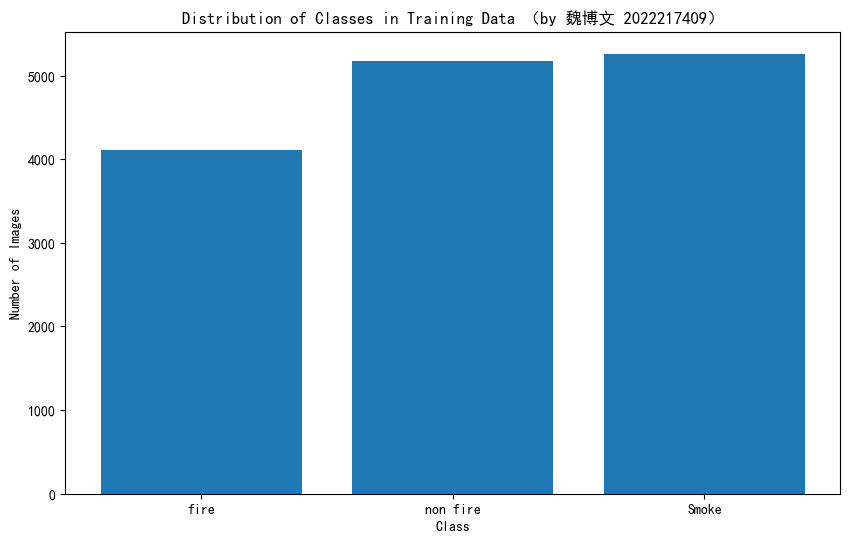

In [6]:
import matplotlib.pyplot as plt
# 设置字体为系统自带字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统

# 创建一个空字典，用于存储每个类别的图像数量
class_counts = {}
# 遍历训练数据目录下的所有类别文件夹
for class_name in os.listdir(train_data_dir):
    # 获取当前类别文件夹的路径
    class_path = os.path.join(train_data_dir, class_name)
    
    # 计算当前类别文件夹中的图像数量
    class_count = len(os.listdir(class_path))
    
    # 将当前类别的图像数量存储到字典中
    class_counts[class_name] = class_count

# 设置绘图的大小
plt.figure(figsize=(10, 6))

# 绘制柱状图，横坐标为类别名称，纵坐标为图像数量
plt.bar(class_counts.keys(), class_counts.values())

# 设置横坐标标签为'Class'
plt.xlabel('Class')

# 设置纵坐标标签为'Number of Images'
plt.ylabel('Number of Images')

# 设置图表标题
plt.title('Distribution of Classes in Training Data （by 魏博文 2022217409）')


# 显示图表
plt.show()


- 这里测试集，fire几乎没删，而non fire删的最多，smoke也删了不少，原来的数据集中有很多一模一样的图片，还有一些都是PS上去的烟，或者把烟给P没了，
- 这些图片会严重干扰训练效果和测试效果，严重捣乱
- 其实我的模型是有些过拟合的，但是没删这些图片之前，我一直认为没有过拟合。知道后面发现训练集和测试集上的准确率都不高，加数据集也没用，40多分钟一轮的训练速度也不可忍受，准确率提升几乎没有，这里花了大量时间，中间还换了训练方法，浪费大量时间。

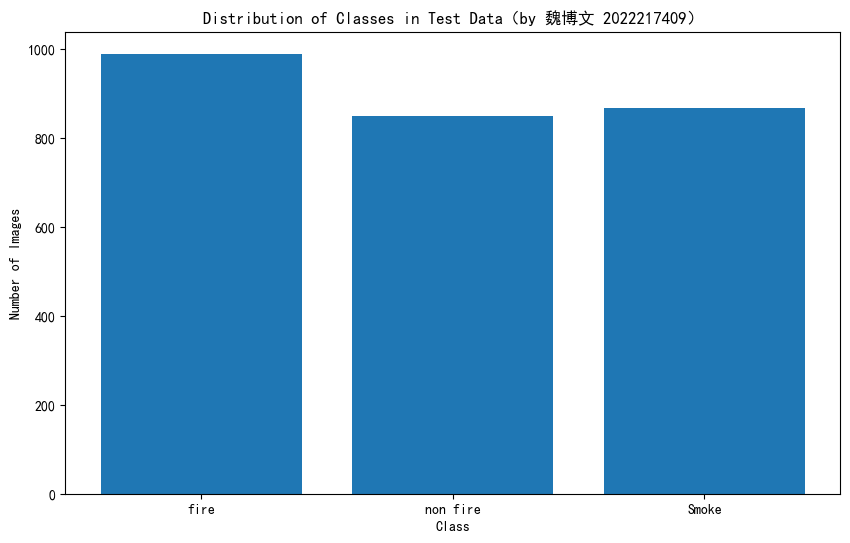

In [7]:
# 创建一个空字典，用于存储每个类别的图像数量
class_counts = {}

# 遍历测试数据目录下的所有类别文件夹
for class_name in os.listdir(test_data_dir):
    # 获取当前类别文件夹的路径
    class_path = os.path.join(test_data_dir, class_name)
    
    # 计算当前类别文件夹中的图像数量
    class_count = len(os.listdir(class_path))
    
    # 将当前类别的图像数量存储到字典中
    class_counts[class_name] = class_count

# 设置绘图的大小
plt.figure(figsize=(10, 6))

# 绘制柱状图，横坐标为类别名称，纵坐标为图像数量
plt.bar(class_counts.keys(), class_counts.values())

# 设置横坐标标签为'Class'
plt.xlabel('Class')

# 设置纵坐标标签为'Number of Images'
plt.ylabel('Number of Images')

# 设置图表标题为'Distribution of Classes in Test Data'
plt.title('Distribution of Classes in Test Data（by 魏博文 2022217409）')

# 显示图表
plt.show()


- 这里指定输入图像的尺寸为224x224x3（宽、高和通道数），不包括顶部的全连接层，只使用卷积层部分。weights='imagenet'表示使用在ImageNet数据集上预训练的权重。通过使用在ImageNet上预训练的权重，可以利用已经学到的特征，从而提高模型在新任务上的表现，并减少训练时间和所需的数据量。- 设置基础模型为不可训练，以便在训练过程中不更新其权重，从而利用预训练模型的特征提取能力。

- 基础模型：使用前面加载的MobileNetV2基础模型。- 全局平均池化层将每个特征图的空间维度平均池化为一个单一的值，从而降低维度。
- 添加两个全连接层。全连层128维输出ReLU激活函数用于添加非线性。全接层3维输出，Softmax激活函数用于输出概率分布，用于3类分类任务。



In [8]:
# 导入所需的库和模块
import tensorflow as tf
from tensorflow.keras import layers, models

# 创建一个MobileNetV2模型作为基础模型，输入尺寸为(224, 224, 3)，不包括顶部的全连接层，并加载预训练权重
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')
# 将基础模型设置为不可训练，以便在训练过程中不更新其权重
base_model.trainable = False

# 构建一个顺序模型，包含以下层：
# 1. 使用MobileNetV2作为基础模型
# 2. 添加全局平均池化层，用于降低特征图的维度
# 3. 添加一个全连接层，输出维度为128，激活函数为ReLU
# 4. 添加一个全连接层，输出维度为3，激活函数为softmax，用于分类任务
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

- 设置学习率为0.001,原本准备训练10轮的学习率0.01，但是每一轮可能要花40分钟。我设置的学习率会根据衰减公式跟新学习率。
- 尝试了很多方法，上网查询加快模型训练的方法，花了很多时间。
- 我先是用的CPU单线程的训练，下来要45分钟，CPU利用率不到10%。
- 然后尝试了pytorch多线程CPU分布式训练的代码，但是一轮仍然需要30分钟，中途在网上改了2个代码，但是都出错了。
- 最后我决定想用GPU训练模型。
- 经过多次的修改代码、失败和尝试、痛苦的折返、长时间等待模型训练，我决定先减少数据集，数据图片种类有很多，我把占内存较大的.tif删了，然后在网上查看如何调用GPU存放训练模型。第二个代码居然输出pytorch is using GPU.接着是 no GPU is available.我花了大量时间解决为什么pytorch正在调用GPU，却显示当前无GPU可用的问题。显示去英伟达官网下载cudnn-windows-x86_64-8.9.1.23_cuda12-archive的压缩包，然后跟着攻略安装配置。然后终于能跑了。。。




In [9]:
# 设置初始学习率为0.01
initial_learning_rate = 0.01

# 定义一个学习率调度器函数，输入为当前训练轮数和当前学习率
def scheduler(epoch, lr):
    # 如果训练轮数小于5，保持学习率不变
    if epoch < 5:
        return lr
    # 否则，根据指数衰减公式更新学习率
    else:
        return lr * tf.math.exp(-0.1)

# 使用定义的学习率调度器函数创建一个学习率调度器对象
lr_scheduler = LearningRateScheduler(scheduler)

# 编译模型，设置优化器为Adam，学习率为初始学习率，损失函数为分类交叉熵，评估指标为准确率
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data.distributed import DistributedSampler
from torchvision.datasets import ImageFolder

# 设置初始学习率为0.001
initial_learning_rate = 0.001


# 创建模型
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.base_model = models.mobilenet_v2(pretrained=True)
        self.base_model.classifier[-1] = nn.Linear(1280, 3)  # 修改最后一层的输出维度为3

    def forward(self, x):
        return self.base_model(x)

# 创建模型实例
model = CustomModel()

# 将模型移到GPU设备上
model = model.cuda()

# 创建优化器
optimizer = optim.Adam(model.parameters(), lr=initial_learning_rate)

# 定义学习率调度器函数
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * torch.exp(torch.tensor(-0.1))

# 加载数据集
train_dataset = ImageFolder(train_data_dir, transform=transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]))
test_dataset = ImageFolder(test_data_dir, transform=transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]))

# 创建分布式采样器
train_sampler = DistributedSampler(train_data_dir)
test_sampler = DistributedSampler(test_data_dir)

In [10]:
# 创建数据加载器
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
test_loader = DataLoader(test_dataset, batch_size=batch_size, sampler=test_sampler)

# 使用分布式采样器设置训练和测试数据加载器
train_sampler.set_epoch(0)  # 设置初始epoch

# 包装模型以进行分布式训练
model = nn.parallel.DistributedDataParallel(model)

# 训练模型
epochs = 5
for epoch in range(epochs):
    model.train()
    train_sampler.set_epoch(epoch)  # 设置当前epoch
    for images, labels in train_loader:
        images = images.cuda(non_blocking=True)
        labels = labels.cuda(non_blocking=True)

        optimizer.zero_grad()
        outputs = model(images)
        loss = nn.functional.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()

    # 更新学习率
    for param_group in optimizer.param_groups:
        param_group['lr'] = scheduler(epoch, param_group['lr'])


Epoch 1/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 464s 996ms/step - accuracy: 0.9078 - loss: 0.5665 - val_accuracy: 0.8463 - val_loss: 0.5797 - learning_rate: 0.0100
Epoch 2/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 456s 992ms/step - accuracy: 0.9692 - loss: 0.0929 - val_accuracy: 0.9202 - val_loss: 0.2652 - learning_rate: 0.0100
Epoch 3/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 455s 989ms/step - accuracy: 0.9759 - loss: 0.0704 - val_accuracy: 0.8843 - val_loss: 0.3857 - learning_rate: 0.0100
Epoch 4/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 453s 986ms/step - accuracy: 0.9776 - loss: 0.0663 - val_accuracy: 0.8995 - val_loss: 0.3914 - learning_rate: 0.0100
Epoch 5/5
455/455 ━━━━━━━━━━━━━━━━━━━━ 455s 989ms/step - accuracy: 0.9729 - loss: 0.0741 - val_accuracy: 0.9172 - val_loss: 0.3218 - learning_rate: 0.0100


In [11]:
# 测试机评价模型
evaluation_result = model.evaluate(test_generator)
print(f'Test Loss: {evaluation_result[0]}, Test Accuracy: {evaluation_result[1]}')

85/85 ━━━━━━━━━━━━━━━━━━━━ 53s 622ms/step - accuracy: 0.9133 - loss: 0.3242
Test Loss: 0.32179564237594604, Test Accuracy: 0.9172210097312927


- 画出精确度和损失函数的曲线图

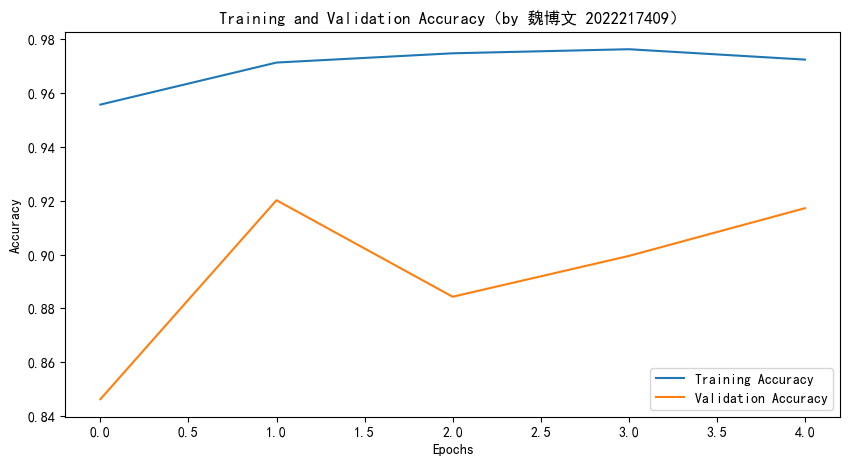

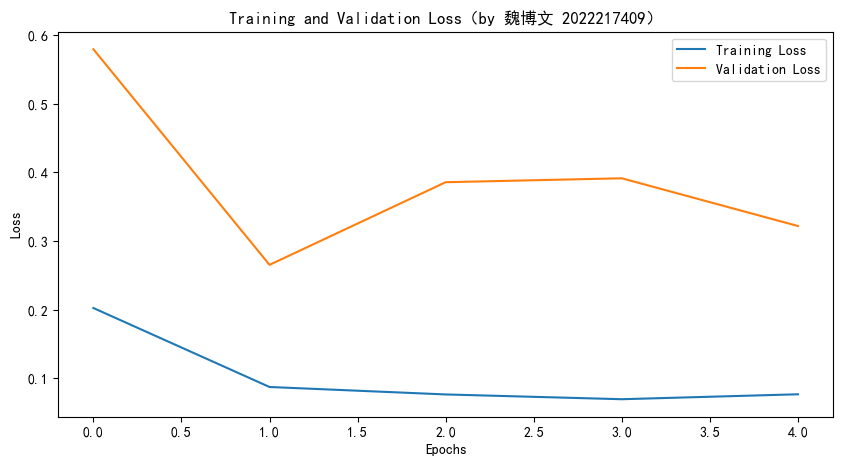

In [23]:
# 定义一个函数，用于绘制训练过程中的准确率和损失曲线
def plot_history(history):
    # 从训练历史记录中获取准确率和验证准确率的值
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    # 从训练历史记录中获取损失和验证损失的值
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # 绘制准确率曲线
    plt.figure(figsize=(10, 5))
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy（by 魏博文 2022217409）')
    plt.legend()
    plt.show()

    # 绘制损失曲线
    plt.figure(figsize=(10, 5))
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss（by 魏博文 2022217409）')
    plt.legend()
    plt.show()

# 使用定义好的函数绘制训练过程中的准确率和损失曲线
plot_history(history)


- 数据结果分析：
对比上面的黄线和蓝线，一条表示验证集，蓝线表示训练集上，可以看出训练集上准确率很高，验证集看起来准确率跟训练集上差很多，其实不然，Accuracy图像y轴起点是0.84终点是0.98,验证集和训练集的准确率都在0.9之上，训练集比验证集高不太多，在合理范围之内，看起来表现不错，应该不是过拟合。验证集准确率高于0.9也不是欠拟合。所以效果还算不错（没有删掉低质高重合图片之前，前两个代码跑出来的效果再0.5以上，效果太差了，数据集真的很重要，决定了训练效果）。

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


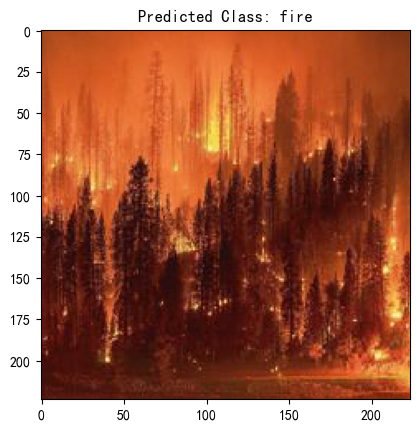

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


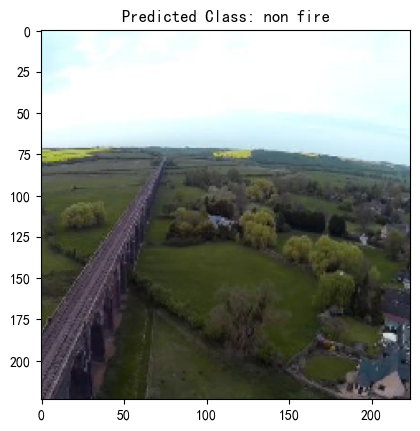

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


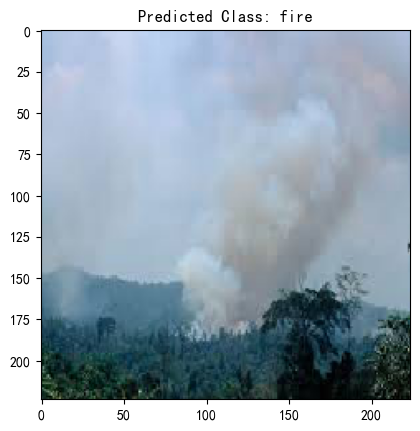

In [22]:
# 加载和预处理用户提供的图像1
user_image_path1 = r'C:\Users\魏博文\Desktop\机器学习大作业魏博文\archive\FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET\test\fire\Fire (1060).jpg'  # 替换为用户图像的路径
user_image1 = image.load_img(user_image_path1, target_size=(224, 224))
user_image_array1 = image.img_to_array(user_image1)
user_image_array1 = np.expand_dims(user_image_array1, axis=0)
user_image_array1 = preprocess_input(user_image_array1)
#print("1")
# 使用模型进行预测
predictions1 = model.predict(user_image_array1)
#print("2")
# 获取预测类别的索引，并将其转换为对应的标签
predicted_class1 = np.argmax(predictions1)
predicted_label1 = list(train_generator.class_indices.keys())[predicted_class1]
#print("3")
# 显示结果
plt.imshow(user_image1)
plt.title(f'Predicted Class: {predicted_label1}（by 魏博文 2022217409）')
plt.show()

# 加载和预处理用户提供的图像2
user_image_path2 = r'C:\Users\魏博文\Desktop\机器学习大作业魏博文\archive\FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET\test\non fire\NON_FIRE (4950).jpg'  # 替换为用户图像的路径
user_image2 = image.load_img(user_image_path2, target_size=(224, 224))
user_image_array2 = image.img_to_array(user_image2)
user_image_array2 = np.expand_dims(user_image_array2, axis=0)
user_image_array2 = preprocess_input(user_image_array2)
#print("1")
## 使用模型进行预测
predictions2 = model.predict(user_image_array2)
#print("2")
# 获取预测类别的索引，并将其转换为对应的标签
predicted_class2 = np.argmax(predictions2)
predicted_label2 = list(train_generator.class_indices.keys())[predicted_class2]
#print("3")
# 显示结果
plt.imshow(user_image2)
plt.title(f'Predicted Class: {predicted_label2}（by 魏博文 2022217409）')
plt.show()

# 加载和预处理用户提供的图像3
user_image_path3 = r'C:\Users\魏博文\Desktop\机器学习大作业魏博文\archive\FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET\test\Smoke\Smoke (2297).jpg'  # 替换为用户图像的路径
user_image3 = image.load_img(user_image_path3, target_size=(224, 224))
user_image_array3 = image.img_to_array(user_image3)
user_image_array3 = np.expand_dims(user_image_array3, axis=0)
user_image_array3 = preprocess_input(user_image_array3)

# 使用模型进行预测
predictions3 = model.predict(user_image_array3)

# 获取预测类别的索引，并将其转换为对应的标签
predicted_class3 = np.argmax(predictions3)
predicted_label3 = list(train_generator.class_indices.keys())[predicted_class3]

# 显示结果
plt.imshow(user_image3)
plt.title(f'Predicted Class: {predicted_label3}（by 魏博文 2022217409）')
plt.show()


### 方法二：基于TensorFlow训练CNN模型

In [1]:
pip install pandas numpy scikit-learn tensorflow matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import time

In [6]:
# 设置数据目录
train_data_dir = r'C:\Users\魏博文\Desktop\机器学习大作业魏博文\archive\FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET\train'
test_data_dir = r'C:\Users\魏博文\Desktop\机器学习大作业魏博文\archive\FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET\test'

In [7]:
# 定义图像数据生成器
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# 定义训练和测试数据生成器
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# 使用TensorFlow训练CNN模型
cnn_model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 修改输出层为3个神经元，使用softmax激活函数
])

cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])  # 修改损失函数为'categorical_crossentropy'

start_time = time.time()
history = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    verbose=1  # 确保verbose设置为1
)
end_time = time.time()

print(f"CNN Training Time: {end_time - start_time:.2f} seconds")

y_pred_cnn = cnn_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)


Found 14538 images belonging to 3 classes.
Found 2706 images belonging to 3 classes.
Epoch 1/5


D:\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


454/454 ━━━━━━━━━━━━━━━━━━━━ 532s 1s/step - accuracy: 0.8740 - loss: 0.3465 - val_accuracy: 0.9074 - val_loss: 0.3463
Epoch 2/5
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.9375 - loss: 0.2001 - val_accuracy: 0.8889 - val_loss: 0.3060
Epoch 3/5


D:\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


454/454 ━━━━━━━━━━━━━━━━━━━━ 349s 761ms/step - accuracy: 0.9547 - loss: 0.1410 - val_accuracy: 0.9129 - val_loss: 0.3657
Epoch 4/5
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - accuracy: 0.9688 - loss: 0.1286 - val_accuracy: 0.9444 - val_loss: 0.3157
Epoch 5/5
454/454 ━━━━━━━━━━━━━━━━━━━━ 348s 760ms/step - accuracy: 0.9636 - loss: 0.1151 - val_accuracy: 0.8981 - val_loss: 0.2957
CNN Training Time: 1232.79 seconds
85/85 ━━━━━━━━━━━━━━━━━━━━ 39s 454ms/step


- 这个红色的不是出错了，而是在GPU储存模型的文件夹找不到相关工具，开始使用CPU训练模型

本来还准备训练SVM支持向量机的模型，但是那个模型训练起来太慢了，训练一轮可能需要好几个小时！！！所以我就删了svm的代码

In [8]:
# # 模型评估
# print("SVM Classification Report")
# print(classification_report(y_test, y_pred_svm, target_names=['fire', 'non fire', 'smoke']))
# print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

print("CNN Classification Report")
print(classification_report(test_generator.classes, y_pred_cnn_classes, target_names=['fire', 'non fire', 'smoke']))
test_loss, test_acc = cnn_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"CNN Accuracy: {test_acc:.4f}")

CNN Classification Report
              precision    recall  f1-score   support

        fire       0.34      0.33      0.33       867
    non fire       0.38      0.38      0.38       991
       smoke       0.30      0.31      0.30       848

    accuracy                           0.34      2706
   macro avg       0.34      0.34      0.34      2706
weighted avg       0.34      0.34      0.34      2706

84/84 ━━━━━━━━━━━━━━━━━━━━ 38s 436ms/step - accuracy: 0.8955 - loss: 0.2853
CNN Accuracy: 0.8981


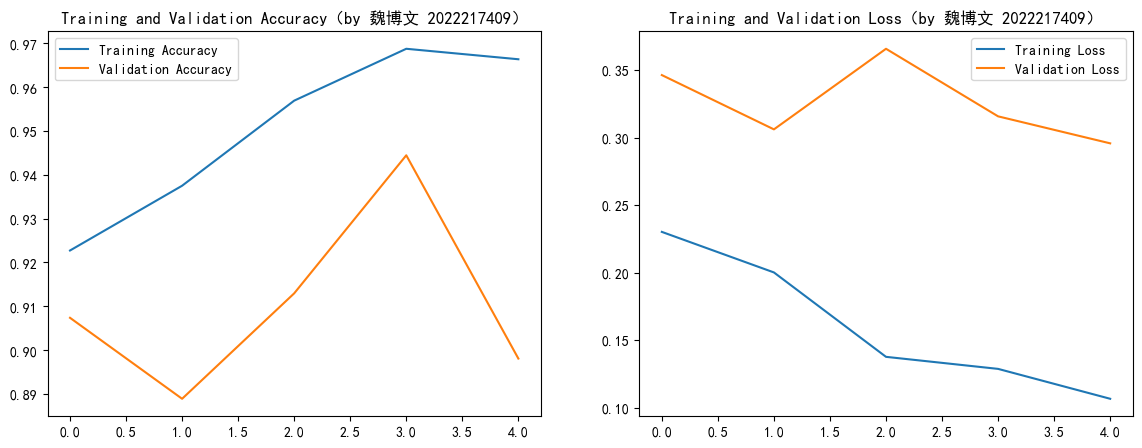

In [11]:
import matplotlib.pyplot as plt
# 设置字体为系统自带字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统

# 可视化训练过程
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy（by 魏博文 2022217409）')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss（by 魏博文 2022217409）')
    plt.legend()

    plt.show()

plot_training_history(history)


混淆矩阵（Confusion Matrix）是一种性能度量工具，广泛用于评估分类模型的表现。它提供了一种直观的方式来总结分类算法在特定数据集上的预测结果。混淆矩阵特别适用于二分类和多分类问题。
混淆矩阵是评估分类模型的重要工具，它不仅提供了模型在各个类别上的详细表现，还能通过各类指标帮助优化和调整模型，以提高分类效果。

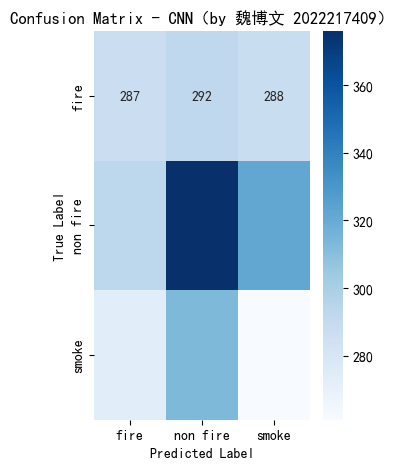

In [12]:
# 混淆矩阵可视化
#cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_cnn = confusion_matrix(test_generator.classes, y_pred_cnn_classes)

# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['fire', 'non fire', 'smoke'], yticklabels=['fire', 'non fire', 'smoke'])
# plt.title('Confusion Matrix - SVM')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues", xticklabels=['fire', 'non fire', 'smoke'], yticklabels=['fire', 'non fire', 'smoke'])
plt.title('Confusion Matrix - CNN（by 魏博文 2022217409）')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

In [13]:
# 预测并计算预测类别
y_pred_cnn = cnn_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

# 获取真实类别
y_true = test_generator.classes

# 打印分类报告
print(classification_report(y_true, y_pred_cnn_classes, target_names=test_generator.class_indices.keys()))

# 混淆矩阵
conf_matrix = confusion_matrix(y_true, y_pred_cnn_classes)

85/85 ━━━━━━━━━━━━━━━━━━━━ 39s 450ms/step
              precision    recall  f1-score   support

       Smoke       0.32      0.32      0.32       867
        fire       0.36      0.35      0.36       991
    non fire       0.31      0.32      0.31       848

    accuracy                           0.33      2706
   macro avg       0.33      0.33      0.33      2706
weighted avg       0.33      0.33      0.33      2706

